## 1. Project Overview

This project aims to develop a robust emotion detection system capable of classifying text-based data into six distinct emotions: sadness, joy, love, anger, fear, and surprise. By leveraging advanced natural language processing (NLP) techniques and machine learning, the goal is to provide accurate and meaningful insights into emotional expressions

## 2. About Dataset 
The dataset used for this project comprises 416,809 samples, annotated with six emotion categories: sadness, joy, love, anger, fear, and surprise. This diverse and large-scale dataset enables the development of a reliable model to understand and predict emotional tones in text

## 3. Objective Statement
The primary objective of this project is to create a high-performing emotion detection model that not only achieves a high classification accuracy but also maintains balanced performance across all emotion categories, addressing potential challenges of class imbalance and subtle differences in emotional expressions

## 4. Project Significance
Understanding emotions in text is crucial for applications in sentiment analysis, mental health monitoring, and customer feedback analysis. This project seeks to bridge the gap by providing a scalable and accurate emotion detection system trained on a comprehensive datasets

## 5. Methodology Overview
This project employs an end-to-end machine learning pipeline, including preprocessing, feature extraction using TF-IDF, and multi-class classification, to develop an emotion detection system tailored for nuanced and balanced prediction across six emotion categories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import spacy

In [2]:
!python -m spacy download en_core_web_sm --q

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
data=pd.read_csv('../data/emotions.csv')
data

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


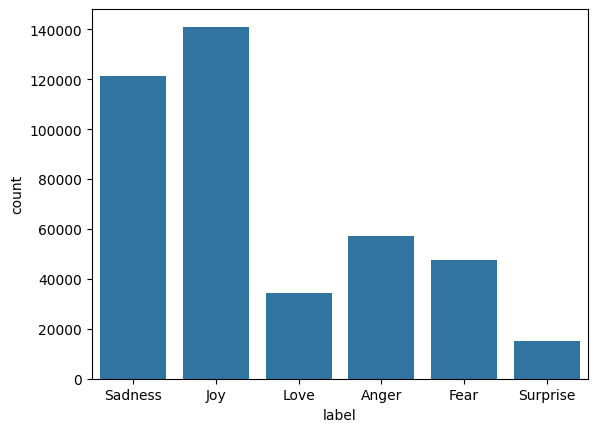

In [5]:
# Decode int label category to string 
emotion_mapping = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}

sns.countplot(data=data, x='label')
plt.xticks(ticks=range(6), labels=list(emotion_mapping.values()))
plt.show()

In [6]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Add other stopword
custom_stopwords = {"feel", "thing", "think", "know", "people", "make", "want", "need", "get", "go", "time", 
                    "feeling", "feelin", "feels", "felt", "feelings", "thinking"}

def text_preprocessing(text):
    # Remove URL, number, punctuation, and common contractions
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[-+]?[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\b(don|doesn|didn|can|couldn|shouldn|won|wouldn|isn|aren|wasn|weren|hasn|haven|hadn|mustn|needn|oughtn|shan|mightn|mayn)\s+t\b', 
                  lambda match: f"{match.group(1)}t", text, flags=re.IGNORECASE)
    text = re.sub(r"\b(?:im|ive|ill|is|youre|theyre|whats|'s|s|'m|m|'ve|ve|'ll|ll)\b", '', text, flags=re.IGNORECASE)
    
    # Text casefolding, stopword removal, and lemmatization
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha and token.lemma_ not in custom_stopwords]
    tokens = [token for token in tokens if token != 's']
    
    return " ".join(tokens)

In [7]:
%%time

data['clean_text'] = data['text'].apply(text_preprocessing)

CPU times: total: 1h 2min 45s
Wall time: 1h 10min 50s


In [8]:
data

,text,label,clean_text
0,i just feel really helpless and heavy hearted,4,helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,enjoy able slouch relax unwind frankly week en...
2,i gave up my internship with the dmrg and am f...,4,give internship dmrg distraught
3,i dont know i feel so lost,0,not lost
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughly weary job have...
...,...,...,...
416804,i feel like telling these horny devils to find...,2,like tell horny devil find site suited sort in...
416805,i began to realize that when i was feeling agi...,3,begin realize agitated restless thought dish
416806,i feel very curious be why previous early dawn...,5,curious previous early dawn not seek trouble
416807,i feel that becuase of the tyranical nature of...,3,becuase tyranical nature government el salvado...


In [9]:
data.to_csv('../data/emotions_clean.csv', index=False)